In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plot

In [3]:
from myinstances import instances_I;

In [4]:
conn = sqlite3.connect('../db/results_1.db')
query = "SELECT * FROM results;"
df2 = pd.read_sql_query(query,conn)
df2 = df2[df2["dataset"] == "I"]

In [5]:
df2["gap"] = df2["makespan_tiv"].round() - df2["max_tot_machine_time"].round()

In [6]:
mtmtmean = df2.groupby("configuration")[["max_tot_machine_time", "makespan_tiv"]].mean()
mtmtmean

,max_tot_machine_time,makespan_tiv
configuration,,
0,132.3,132.6
1,158.7,158.7
2,214.2,214.2
3,232.1,232.1
4,424.0,424.0
5,489.5,489.5
6,83.1,83.1
7,122.0,122.0
8,138.2,138.2


In [7]:
withgap = df2[df2["gap"] > 0]
withgap

,configuration,instance,dataset,makespan_piv,runtime_piv,makespan_piv_r,runtime_piv_r,makespan_lov,runtime_lov,makespan_lov_r,...,makespan_tiv,runtime_tiv,method_tiv,makespan_tiv_r,runtime_tiv_r,method_tiv_r,makespan_heuristic,runtime_heuristic,max_tot_machine_time,gap
10,10,1,I,NaN,NaN,245.0,5.418164,242.0,138.075142,241.0,...,242.0,10.218066,unknown,241.000000,1.649928,unknown,None,None,241.0,1.0
13,10,4,I,NaN,NaN,263.0,6.195804,247.0,104.690783,246.0,...,247.0,14.029802,unknown,246.000000,1.572847,unknown,None,None,246.0,1.0
112,0,3,I,127.0,14.492641,127.0,0.118151,123.0,0.105020,121.0,...,123.0,0.304212,unknown,121.666667,0.028427,unknown,None,None,121.0,2.0
116,0,7,I,128.0,38.794779,128.0,0.114795,126.0,0.107585,125.0,...,126.0,0.294728,unknown,125.000000,0.028541,unknown,None,None,125.0,1.0


In [8]:
from program.instance import Instance

for i in withgap.iterrows():
    series = i[1]
    instance : Instance = instances_I[series["configuration"]].instances[series["instance"] - 1]
    cnt = 0
    tmt = []
    for m in instance.machines:
        jobs = []
        t = 0
        for i in range(len(m)):
            job = m[i].s + m[i].p
            jobs.append(job)
            t += job
        if t >= series["max_tot_machine_time"]:
            cnt += 1
        tmt.append(t)
        print(jobs)
    print(series["configuration"], series["instance"], series["max_tot_machine_time"])
    print("Max reach count " + str(cnt))

[7, 12, 13, 6, 17, 21, 18, 11, 3, 14, 9, 12, 10, 12, 3, 16, 6, 18, 20, 13]
[14, 11, 3, 18, 11, 4, 4, 4, 18, 8, 7, 19, 15, 4, 8, 19, 14, 17, 7, 10]
[19, 3, 3, 13, 10, 21, 21, 16, 2, 3, 4, 9, 4, 20, 20, 14, 10, 19, 7, 12]
[18, 15, 13, 6, 3, 11, 9, 20, 5, 9, 3, 3, 7, 10, 17, 17, 21, 18, 13, 21]
[17, 17, 9, 2, 20, 21, 18, 14, 14, 8, 7, 13, 9, 18, 5, 4, 7, 7, 20, 4]
10 1 241.0
Max reach count 1
[15, 12, 7, 18, 14, 12, 3, 11, 12, 17, 8, 9, 5, 10, 21, 14, 4, 4, 13, 10]
[8, 12, 20, 6, 21, 12, 10, 17, 3, 13, 13, 16, 9, 20, 19, 17, 8, 16, 3, 2]
[9, 14, 8, 18, 2, 2, 21, 2, 3, 10, 16, 7, 19, 16, 10, 19, 20, 19, 11, 20]
[6, 7, 7, 18, 12, 21, 8, 6, 21, 15, 9, 10, 18, 5, 8, 18, 17, 6, 6, 13]
[12, 18, 11, 4, 11, 5, 11, 14, 12, 10, 8, 5, 5, 19, 20, 6, 2, 2, 20, 11]
10 4 246.0
Max reach count 1
[16, 3, 20, 19, 8, 9, 10, 8, 21, 7]
[10, 9, 12, 19, 20, 17, 4, 8, 16, 6]
[15, 16, 12, 13, 8, 10, 17, 7, 16, 6]
0 3 121.0
Max reach count 2
[15, 19, 14, 8, 13, 8, 2, 19, 9, 16]
[4, 16, 5, 16, 2, 11, 21, 8, 8, 5]
[

In [10]:
conn = sqlite3.connect('../db/results_1.db')
query = "SELECT * FROM results ORDER BY configuration, instance;"
df_tivlovpiv = pd.read_sql_query(query,conn)

In [12]:
grouped = df_tivlovpiv.groupby("configuration").mean()

countopt = (df_tivlovpiv["makespan_tiv"].round() == df_tivlovpiv["max_tot_machine_time"].round()).groupby(df_tivlovpiv["configuration"]).sum()

grouped["opt"] = countopt
grouped

df_tivlovpiv_results = grouped.reset_index()
df_tivlovpiv_results["configuration"] = df_tivlovpiv_results["configuration"].map(lambda i: f"I.{i+1}")
df_tivlovpiv_results

,configuration,instance,makespan_piv,runtime_piv,makespan_piv_r,runtime_piv_r,makespan_lov,runtime_lov,makespan_lov_r,runtime_lov_r,makespan_tiv,runtime_tiv,makespan_tiv_r,runtime_tiv_r,max_tot_machine_time,opt
0,I.1,5.5,133.333333,49.693653,133.111111,0.116593,132.6,0.090565,132.3,0.086071,132.6,0.357345,132.366667,0.027925,132.3,8
1,I.2,5.5,158.700000,13.931463,158.700000,0.118583,158.7,0.090122,158.7,0.084030,158.7,0.350485,158.700000,0.027768,158.7,10
2,I.3,5.5,NaN,NaN,214.200000,0.621750,214.2,0.522559,214.2,0.618284,214.2,1.488069,214.200000,0.113570,214.2,10
3,I.4,5.5,NaN,NaN,232.100000,0.622016,232.1,0.556079,232.1,0.619495,232.1,1.357965,232.100000,0.111261,232.1,10
4,I.5,5.5,NaN,NaN,424.000000,5.773025,424.0,25.920449,424.0,5.463393,424.0,12.275488,424.000000,2.025873,424.0,10
5,I.6,5.5,NaN,NaN,489.500000,5.719930,489.5,18.807327,489.5,4.531728,489.5,11.740310,489.500000,1.800297,489.5,10
6,I.7,5.5,NaN,NaN,83.100000,0.116616,83.1,0.112560,83.1,0.099088,83.1,0.322613,83.100000,0.025685,83.1,10
7,I.8,5.5,NaN,NaN,122.000000,0.116052,122.0,0.112445,122.0,0.097232,122.0,0.364495,122.000000,0.028869,122.0,10
8,I.9,5.5,NaN,NaN,138.200000,0.622337,138.2,0.809465,138.2,0.669626,138.2,1.243688,138.200000,0.115554,138.2,10
9,I.10,5.5,NaN,NaN,213.500000,0.621677,213.5,0.854089,213.5,0.661453,213.5,1.572117,213.500000,0.122632,213.5,10


In [13]:
df_tivlovpiv_results[["runtime_lov", "runtime_tiv"]].mean()

runtime_lov    21.49230
runtime_tiv     4.71027
dtype: float64

In [14]:
import pyperclip
columns1 = ["configuration"] + [pattern[0] + typ + pattern[1] for typ in ["piv", "lov", "tiv"] for pattern in [("makespan_", ""), ("makespan_", "_r")]] + ["max_tot_machine_time", "opt"]

latex_names1 = ["Conf"] + ["$" + val + "$" for val in ([pattern[0] + typ + pattern[1] for typ in ["PIV", "LOV", "TIV"] for pattern in [("C_{max}^{", "}"), ("C_{max}^{", "r}")]] + ["T_\\cM", "\\#Opt"])]

pyperclip.copy(df_tivlovpiv_results.to_latex(columns=columns1, header=latex_names1, float_format="%.1f", escape=False, index=False, na_rep="-", column_format="l" + "c"*(len(columns1)-1)))

/tmp/ipykernel_2141/1308652919.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  pyperclip.copy(df_tivlovpiv_results.to_latex(columns=columns1, header=latex_names1, float_format="%.1f", escape=False, index=False, na_rep="-", column_format="l" + "c"*(len(columns1)-1)))


In [15]:
columns2 = ["configuration"] + [pattern[0] + typ + pattern[1] for typ in ["piv", "lov", "tiv"] for pattern in [("runtime_", ""), ("runtime_", "_r")]]

latex_names2 = ["Conf"] + ["$" + val + "$" for val in ([pattern[0] + typ + pattern[1] for typ in ["PIV", "LOV", "TIV"] for pattern in [("W^{", "}"), ("W^{", "r}")]])]

pyperclip.copy(df_tivlovpiv_results.to_latex(columns=columns2, header=latex_names2, float_format="%.1f", escape=False, index=False, na_rep="-", column_format="l" + "c"*(len(columns2)-1)))

/tmp/ipykernel_2141/2398251540.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  pyperclip.copy(df_tivlovpiv_results.to_latex(columns=columns2, header=latex_names2, float_format="%.1f", escape=False, index=False, na_rep="-", column_format="l" + "c"*(len(columns2)-1)))


In [16]:
conn = sqlite3.connect('../db/results_23.db')
query = "SELECT * FROM results;"
df_gap = pd.read_sql_query(query,conn)

df_gap["gap"] = df_gap["makespan_tiv"] - df_gap["max_tot_machine_time"]
df_gap["percgap"] = 100 * df_gap["gap"] / df_gap["max_tot_machine_time"]

df_gap["configuration"] = df_gap["configuration"] + 1


df_gap = df_gap[["configuration", "instance", "dataset", "makespan_tiv", "makespan_tiv_r", "max_tot_machine_time", "gap", "runtime_tiv", "runtime_tiv_r", "percgap"]]
df_gap = df_gap.round(decimals=2).replace(-0, 0)

dic = { "II.A": 1, "III.A": 1, "II.B": 2, "III.B": 2}
df_gap["EsEp"] = df_gap.apply(lambda s: dic[s["dataset"]] / s["configuration"] / 2, axis=1)
df_gap

,configuration,instance,dataset,makespan_tiv,makespan_tiv_r,max_tot_machine_time,gap,runtime_tiv,runtime_tiv_r,percgap,EsEp
0,19,1,II.A,114.0,114.00,114.0,0.0,1.28,0.03,0.00,0.026316
1,19,2,II.A,116.0,116.00,116.0,0.0,0.64,0.02,0.00,0.026316
2,19,3,II.A,118.0,118.00,118.0,0.0,0.70,0.03,0.00,0.026316
3,19,4,II.A,115.0,114.00,114.0,1.0,0.45,0.03,0.88,0.026316
4,19,5,II.A,130.0,130.00,130.0,0.0,0.95,0.02,0.00,0.026316
...,...,...,...,...,...,...,...,...,...,...,...
755,1,6,III.B,55.0,35.60,19.0,36.0,57.53,0.06,189.47,1.000000
756,1,7,III.B,58.0,36.79,17.0,41.0,62.05,0.07,241.18,1.000000
757,1,8,III.B,66.0,42.02,21.0,45.0,61.04,0.09,214.29,1.000000
758,1,9,III.B,64.0,39.81,17.0,47.0,65.60,0.08,276.47,1.000000


In [19]:
df_gap["isopt"] = df_gap["makespan_tiv"] == df_gap["max_tot_machine_time"]

dfgap_group = df_gap.groupby(["dataset", "configuration"])

dfgap_opt_count = dfgap_group["isopt"].sum()


dfgap_results = dfgap_group.mean()
dfgap_results["opt"] = dfgap_opt_count

dfgap_results = dfgap_results.reset_index()

dfgap_results = dfgap_results[dfgap_results["configuration"].isin([3, 5, 7])]

dfgap_results["configuration"] = dfgap_results.apply(lambda s: s["dataset"] + "." + str(s["configuration"]), axis=1)
dfgap_results

,dataset,configuration,instance,makespan_tiv,makespan_tiv_r,max_tot_machine_time,gap,runtime_tiv,runtime_tiv_r,percgap,EsEp,isopt,opt
2,II.A,II.A.3,5.5,31.7,28.990,28.0,3.7,37.462,0.019,13.968,0.166667,0.1,1
4,II.A,II.A.5,5.5,38.8,37.417,37.2,1.6,18.251,0.016,4.506,0.100000,0.2,2
6,II.A,II.A.7,5.5,50.7,50.225,50.2,0.5,5.293,0.013,1.092,0.071429,0.6,6
21,II.B,II.B.3,5.5,62.4,50.045,40.0,22.4,44.889,0.097,56.209,0.333333,0.0,0
23,II.B,II.B.5,5.5,61.3,53.021,49.9,11.4,40.959,0.101,23.190,0.200000,0.0,0
25,II.B,II.B.7,5.5,69.0,63.877,63.4,5.6,37.780,0.076,9.156,0.142857,0.0,0
40,III.A,III.A.3,5.5,30.3,23.680,18.9,11.4,45.967,0.024,62.205,0.166667,0.0,0
42,III.A,III.A.5,5.5,30.9,26.803,24.9,6.0,43.364,0.026,25.401,0.100000,0.0,0
44,III.A,III.A.7,5.5,35.8,35.167,35.1,0.7,11.749,0.018,2.112,0.071429,0.5,5
59,III.B,III.B.3,5.5,58.7,39.952,23.5,35.2,57.433,0.083,151.704,0.333333,0.0,0


In [20]:
import pyperclip
columns1 = ["configuration", "makespan_tiv", "runtime_tiv", "makespan_tiv_r", "runtime_tiv_r", "max_tot_machine_time", "opt"]

latex_names1 = ["Conf", "$C_{max}^{TIV}$", "$W^{TIV}$", "$C_{max}^{TIVr}$", "$W^{TIVr}$", "$T_\\cM$", "$\\#Opt$"]

pyperclip.copy(dfgap_results.to_latex(columns=columns1, header=latex_names1, float_format="%.1f", escape=False, index=False, na_rep="-", column_format="l" + "c"*(len(columns1)-1)))

/tmp/ipykernel_2141/1953852381.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  pyperclip.copy(dfgap_results.to_latex(columns=columns1, header=latex_names1, float_format="%.1f", escape=False, index=False, na_rep="-", column_format="l" + "c"*(len(columns1)-1)))


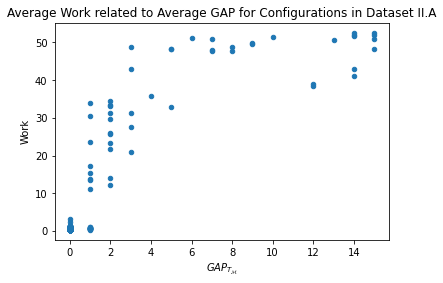

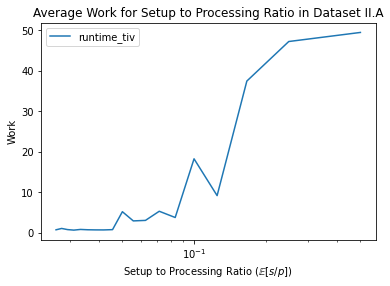

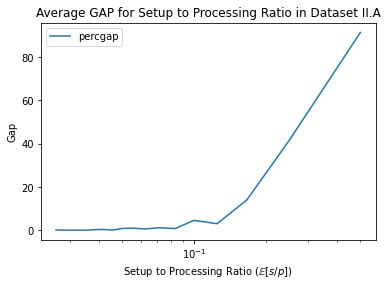

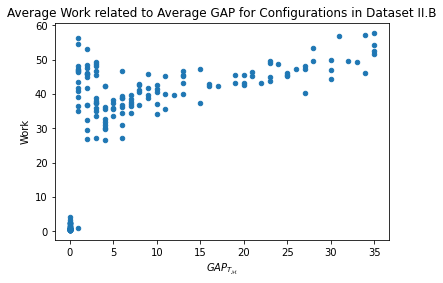

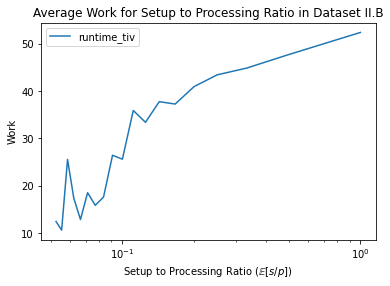

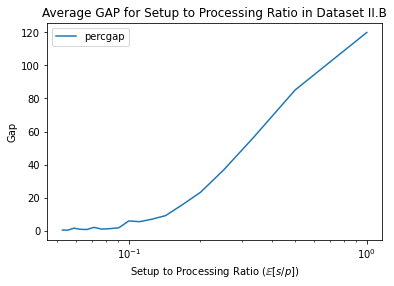

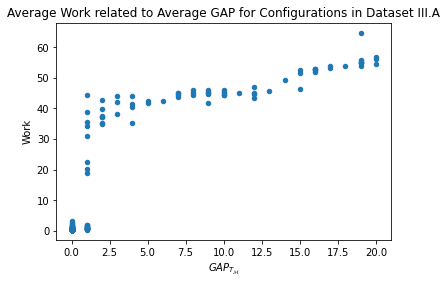

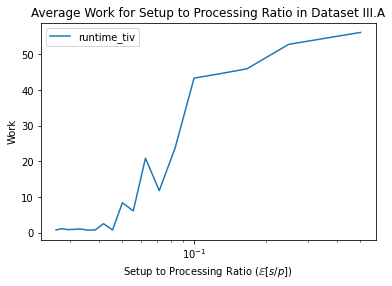

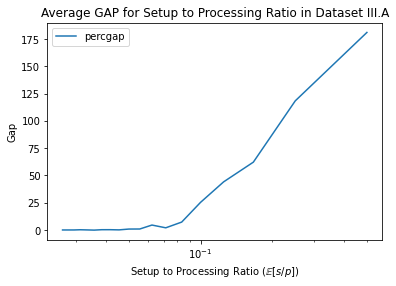

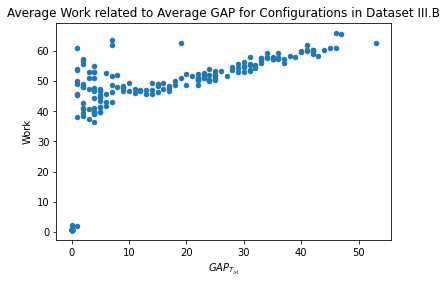

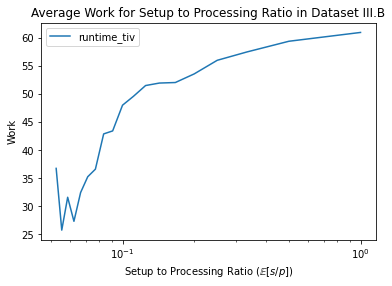

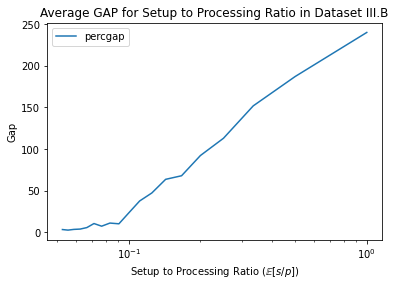

In [21]:
for (dataset, group) in df_gap.groupby("dataset"):
    group.plot(kind="scatter", x="gap", y="runtime_tiv", xlabel="$GAP_{T_\mathcal{M}}$", ylabel="Work", title="Average Work related to Average GAP for Configurations in Dataset " + dataset)
    fig, ax = plot.subplots()
    group.groupby("configuration").mean().reset_index().plot(kind="line", x="EsEp", y="runtime_tiv", xlabel="Setup to Processing Ratio ($\mathbb{E}[s/p]$)", ylabel="Work", title="Average Work for Setup to Processing Ratio in Dataset " + dataset, ax=ax)
    ax.set_xscale('log')
    fig, ax = plot.subplots()
    group.groupby("configuration").mean().reset_index().plot(kind="line", x="EsEp", y="percgap", xlabel="Setup to Processing Ratio ($\mathbb{E}[s/p]$)", ylabel="Gap", title="Average GAP for Setup to Processing Ratio in Dataset " + dataset, ax=ax)
    ax.set_xscale('log')



<AxesSubplot:title={'center':'Relation of Work and GAP for all Instances in Datasets $II$ and $III$'}, xlabel='$GAP_{T_\\mathcal{M}}$', ylabel='Work'>

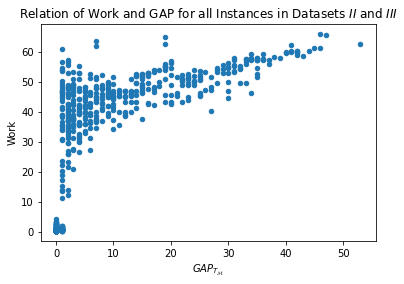

In [23]:
df_gap.plot(kind="scatter", x="gap", y="runtime_tiv", xlabel="$GAP_{T_\mathcal{M}}$", ylabel="Work", title="Relation of Work and GAP for all Instances in Datasets $II$ and $III$")

<AxesSubplot:title={'center':'Relation of Average Work and Average GAP for all Configurations in Datasets $II$ and $III$'}, xlabel='gap', ylabel='runtime_tiv'>

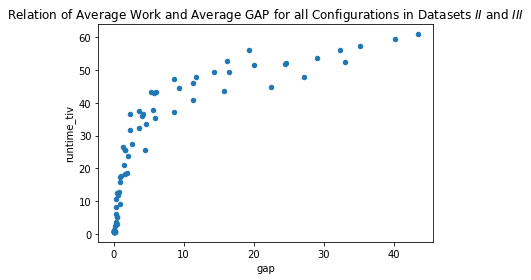

In [24]:
df_gap.groupby(["dataset", "configuration"]).mean().plot(kind="scatter", x="gap", y="runtime_tiv", title="Relation of Average Work and Average GAP for all Configurations in Datasets $II$ and $III$")

In [25]:
groups = df_gap.groupby("dataset")
groups

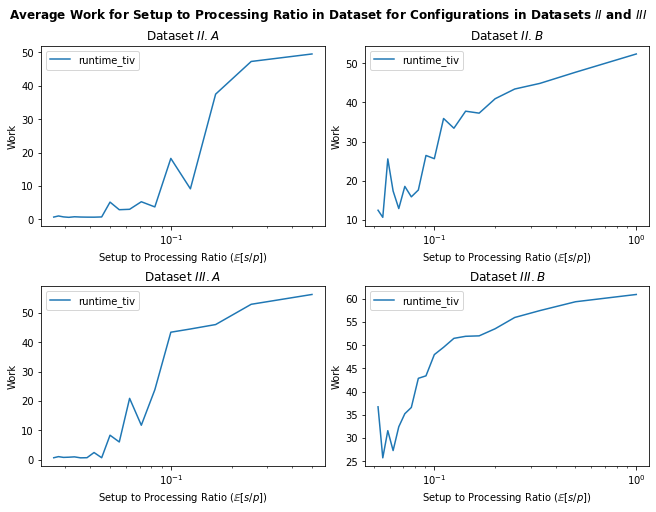

In [26]:
fig, axs = plot.subplots(2, 2)
keymap = {"II.A": ("$II.A$", axs[0, 0]), "II.B": ("$II.B$", axs[0, 1]), "III.A": ("$III.A$", axs[1, 0]), "III.B": ("$III.B$", axs[1, 1])}
for (key, group) in df_gap.groupby("dataset"):
    (dataset, ax) = keymap[key]
    group.groupby("configuration").mean().reset_index().plot(kind="line", x="EsEp", y="runtime_tiv", xlabel="Setup to Processing Ratio ($\mathbb{E}[s/p]$)", ylabel="Work", title="Dataset " + dataset, ax=ax)
    ax.set_xscale('log')

fig.set_constrained_layout(constrained=True)
fig.set_size_inches(9, 7)
fig.suptitle("Average Work for Setup to Processing Ratio in Dataset for Configurations in Datasets $II$ and $III$", fontweight="bold", fontsize="large")
fig.savefig("per_dataset_work.pdf")

Text(0.5, 0.98, 'Average Work for Setup to Processing Ratio in Dataset for Configurations in Datasets $II$ and $III$')

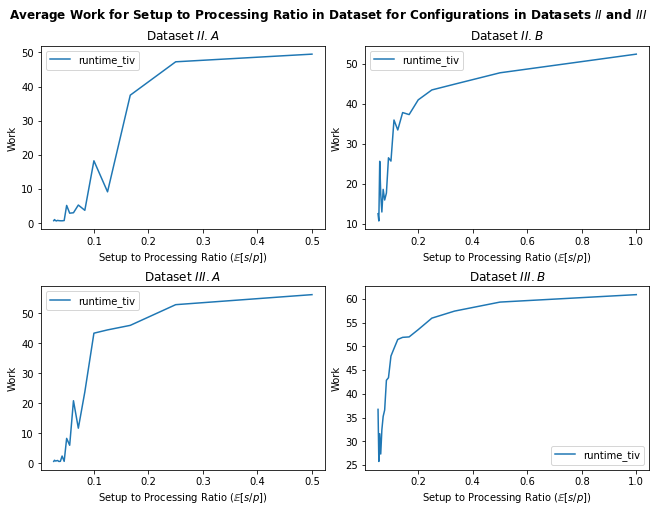

In [27]:
fig, axs = plot.subplots(2, 2)
keymap = {"II.A": ("$II.A$", axs[0, 0]), "II.B": ("$II.B$", axs[0, 1]),
          "III.A": ("$III.A$", axs[1, 0]), "III.B": ("$III.B$", axs[1, 1])}
for (key, group) in df_gap.groupby("dataset"):
    (dataset, ax) = keymap[key]
    group.groupby("configuration").mean().reset_index().plot(kind="line", x="EsEp", y="runtime_tiv",
                                                             xlabel="Setup to Processing Ratio ($\mathbb{E}[s/p]$)",
                                                             ylabel="Work", title="Dataset " + dataset, ax=ax)

fig.set_constrained_layout(constrained=True)
fig.set_size_inches(9, 7)
fig.suptitle("Average Work for Setup to Processing Ratio in Dataset for Configurations in Datasets $II$ and $III$",
             fontweight="bold", fontsize="large")

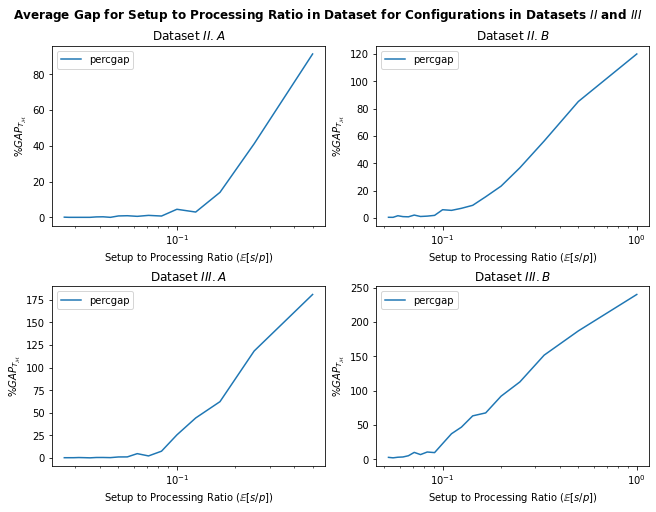

In [28]:
fig, axs = plot.subplots(2, 2)
keymap = {"II.A": ("$II.A$", axs[0, 0]), "II.B": ("$II.B$", axs[0, 1]),
          "III.A": ("$III.A$", axs[1, 0]), "III.B": ("$III.B$", axs[1, 1])}
for (key, group) in df_gap.groupby("dataset"):
    (dataset, ax) = keymap[key]
    group.groupby("configuration").mean().reset_index().plot(kind="line", x="EsEp", y="percgap", xlabel="Setup to Processing Ratio ($\mathbb{E}[s/p]$)", ylabel="$\%GAP_{T_\mathcal{M}}$", title="Dataset " + dataset, ax=ax)
    ax.set_xscale('log')

fig.suptitle("Average Gap for Setup to Processing Ratio in Dataset for Configurations in Datasets $II$ and $III$", fontweight="bold", fontsize="large")
fig.set_constrained_layout(constrained=True)
fig.set_size_inches(9, 7)
fig.savefig("per_dataset_gap.pdf")

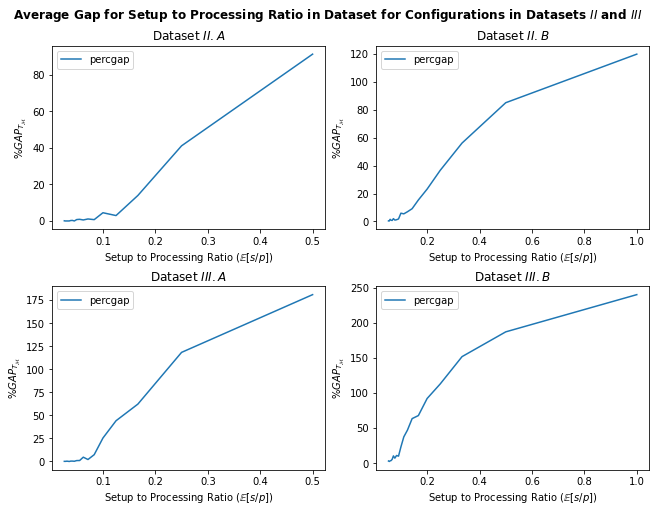

In [29]:
fig, axs = plot.subplots(2, 2)
keymap = {"II.A": ("$II.A$", axs[0, 0]), "II.B": ("$II.B$", axs[0, 1]),
          "III.A": ("$III.A$", axs[1, 0]), "III.B": ("$III.B$", axs[1, 1])}
for (key, group) in df_gap.groupby("dataset"):
    (dataset, ax) = keymap[key]
    group.groupby("configuration").mean().reset_index().plot(kind="line", x="EsEp", y="percgap", xlabel="Setup to Processing Ratio ($\mathbb{E}[s/p]$)", ylabel="$\%GAP_{T_\mathcal{M}}$", title="Dataset " + dataset, ax=ax)

fig.suptitle("Average Gap for Setup to Processing Ratio in Dataset for Configurations in Datasets $II$ and $III$", fontweight="bold", fontsize="large")
fig.set_constrained_layout(constrained=True)
fig.set_size_inches(9, 7)

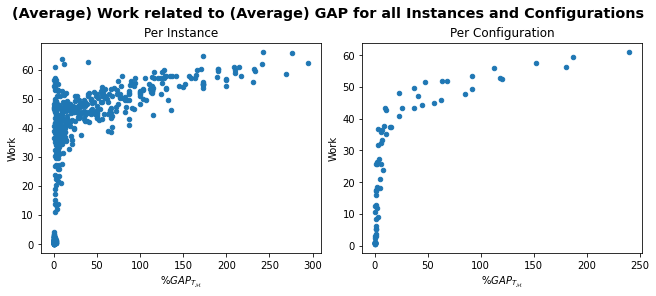

In [30]:
fig, axs = plot.subplots(1, 2)
df_gap.plot(kind="scatter", x="percgap", y="runtime_tiv", xlabel="$\%GAP_{T_\mathcal{M}}$", ylabel="Work", title="Per Instance", ax=axs[0])
df_gap.groupby(["dataset", "configuration"]).mean().plot(kind="scatter", x="percgap", y="runtime_tiv", xlabel="$\%GAP_{T_\mathcal{M}}$", ylabel="Work", title="Per Configuration", ax=axs[1])
fig.set_constrained_layout(constrained=True)
fig.set_size_inches(9, 4)
fig.suptitle("(Average) Work related to (Average) GAP for all Instances and Configurations", fontweight="bold", fontsize="x-large")
fig.savefig("combined.pdf")


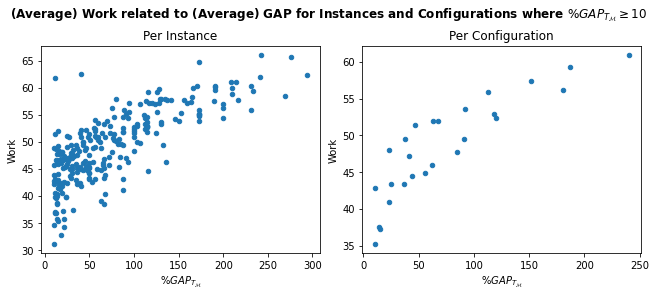

In [31]:
fig, axs = plot.subplots(1, 2)
df_gap[df_gap["percgap"] >= 10].plot(kind="scatter", x="percgap", y="runtime_tiv", xlabel="$\%GAP_{T_\mathcal{M}}$", ylabel="Work", title="Per Instance", ax=axs[0])

grp = df_gap.groupby(["dataset", "configuration"]).mean()

grp[grp["percgap"] >= 10].plot(kind="scatter", x="percgap", y="runtime_tiv", xlabel="$\%GAP_{T_\mathcal{M}}$", ylabel="Work", title="Per Configuration", ax=axs[1])
fig.set_constrained_layout(constrained=True)
fig.set_size_inches(9, 4)
fig.suptitle("(Average) Work related to (Average) GAP for Instances and Configurations where $\%GAP_{T_\mathcal{M}} \geq 10$", fontweight="bold", fontsize="large")
fig.savefig("combinedcutoff.pdf")